In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)

#to be used in later visualizations
base_color = sns.color_palette()[0]


Bad key "text.kerning_factor" on line 4 in
/Users/yazeed/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("prosperLoanData.csv")

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

# Before we do any data visualization let's first limit the nmber of variables

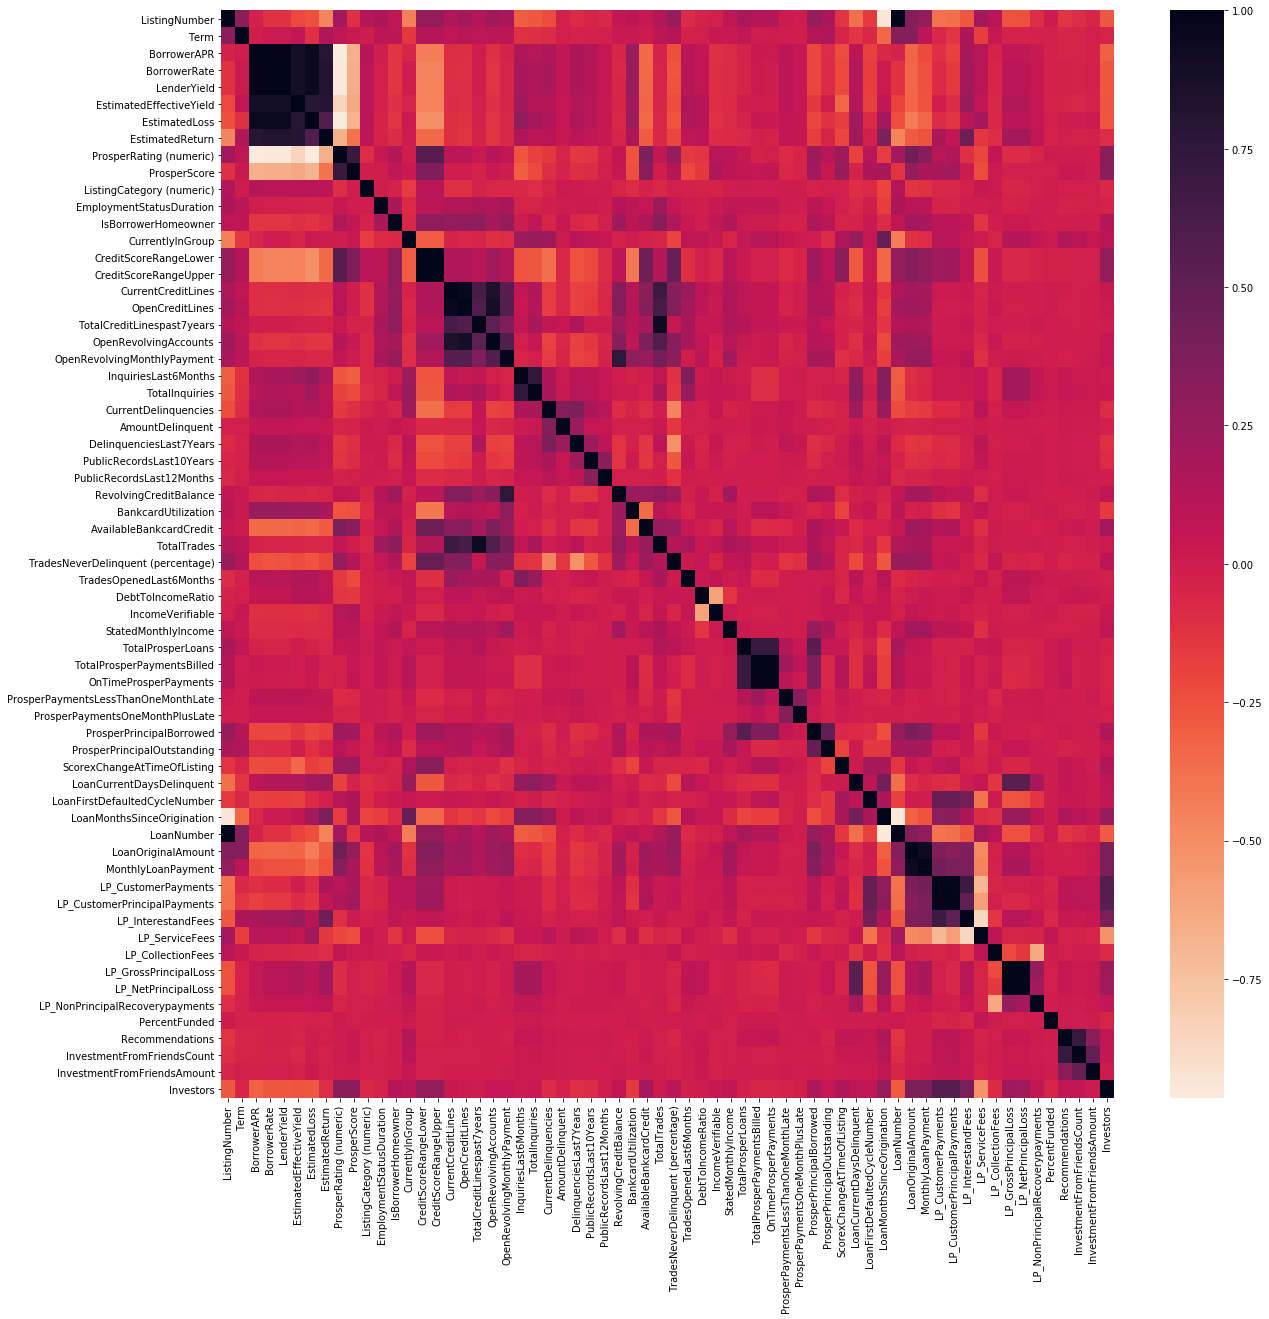

In [5]:
plt.figure(figsize=[20, 20])
sns.heatmap(df.corr(), cmap="rocket_r")

#### After checking the documentation of our dataset AND analyzing the heatmap above i chose the following variables:
1. Listing Key
2. Listing Number
3. ListingCreationDate
4. LoanStatus
5. BorrowerAPR
6. BorrowerRate
7. ProsperScore
8. Occupation
9. EmploymentStatus
10. EmploymentStatusDuration
11. IsBorrowerHomeowner
12. CreditScoreRangeLower
13. CreditScoreRangeUpper
14. IncomeRange
15. LoanOriginalAmount
16. MonthlyLoanPayment
17. Investors
18. Term
19. ListingCategory
20. BorrowerState
21. BankcardUtilization
22. CurrentDelinquencies
23. TotalInquiries

In [6]:
columns = ["ListingKey", "ListingNumber","ListingCreationDate",
           "LoanStatus","BorrowerAPR","BorrowerRate", "Term", "ListingCategory (numeric)",
           "ProsperScore","Occupation","EmploymentStatus","EmploymentStatusDuration",
           "IsBorrowerHomeowner", "CreditScoreRangeLower", "CreditScoreRangeUpper",
           "IncomeRange", "LoanOriginalAmount", "MonthlyLoanPayment", "Investors",
           "BorrowerState", "BankcardUtilization", "CurrentDelinquencies", "TotalInquiries"]

In [7]:
df = df[columns]

# General Analysis

In [8]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,LoanStatus,BorrowerAPR,BorrowerRate,Term,ListingCategory (numeric),ProsperScore,Occupation,...,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,BorrowerState,BankcardUtilization,CurrentDelinquencies,TotalInquiries
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,Completed,0.16516,0.1580,36,0,NaN,Other,...,640.0,659.0,"$25,000-49,999",9425,330.43,258,CO,0.00,2.0,3.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,Current,0.12016,0.0920,36,2,7.0,Professional,...,680.0,699.0,"$50,000-74,999",10000,318.93,1,CO,0.21,0.0,5.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,Completed,0.28269,0.2750,36,0,NaN,Other,...,480.0,499.0,Not displayed,3001,123.32,41,GA,NaN,1.0,1.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,Current,0.12528,0.0974,36,16,9.0,Skilled Labor,...,800.0,819.0,"$25,000-49,999",10000,321.45,158,GA,0.04,4.0,1.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,Current,0.24614,0.2085,36,2,4.0,Executive,...,680.0,699.0,"$100,000+",15000,563.97,20,MN,0.81,0.0,9.0


In [9]:
df.isnull().sum().sum()

58734

In [10]:
df.isnull().sum().sort_values(ascending=False).head(8)

ProsperScore                29084
EmploymentStatusDuration     7625
BankcardUtilization          7604
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
TotalInquiries               1159
CurrentDelinquencies          697
dtype: int64

In [11]:
df.describe()


,ListingNumber,BorrowerAPR,BorrowerRate,Term,ListingCategory (numeric),ProsperScore,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,LoanOriginalAmount,MonthlyLoanPayment,Investors,BankcardUtilization,CurrentDelinquencies,TotalInquiries
count,1.139370e+05,113912.000000,113937.000000,113937.000000,113937.000000,84853.000000,106312.000000,113346.000000,113346.000000,113937.00000,113937.000000,113937.000000,106333.000000,113240.000000,112778.000000
mean,6.278857e+05,0.218828,0.192764,40.830248,2.774209,5.950067,96.071582,685.567731,704.567731,8337.01385,272.475783,80.475228,0.561309,0.592052,5.584405
std,3.280762e+05,0.080364,0.074818,10.436212,3.996797,2.376501,94.480605,66.458275,66.458275,6245.80058,192.697812,103.239020,0.317918,1.978707,6.429946
min,4.000000e+00,0.006530,0.000000,12.000000,0.000000,1.000000,0.000000,0.000000,19.000000,1000.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,4.009190e+05,0.156290,0.134000,36.000000,1.000000,4.000000,26.000000,660.000000,679.000000,4000.00000,131.620000,2.000000,0.310000,0.000000,2.000000
50%,6.005540e+05,0.209760,0.184000,36.000000,1.000000,6.000000,67.000000,680.000000,699.000000,6500.00000,217.740000,44.000000,0.600000,0.000000,4.000000
75%,8.926340e+05,0.283810,0.250000,36.000000,3.000000,8.000000,137.000000,720.000000,739.000000,12000.00000,371.580000,115.000000,0.840000,0.000000,7.000000
max,1.255725e+06,0.512290,0.497500,60.000000,20.000000,11.000000,755.000000,880.000000,899.000000,35000.00000,2251.510000,1189.000000,5.950000,83.000000,379.000000


In [12]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'Term', 'ListingCategory (numeric)',
       'ProsperScore', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',
       'BorrowerState', 'BankcardUtilization', 'CurrentDelinquencies',
       'TotalInquiries'],
      dtype='object')

* Let's look at Term column so that we know how long the loans are


In [13]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

So it is either a year, 3 years, or 5 yaers, we can maybe change the values to make it easier to visualize


In [14]:
df.Term = df.Term.map({12: 1, 36: 3, 60: 5})

In [15]:
df.Term.value_counts()


3    87778
5    24545
1     1614
Name: Term, dtype: int64

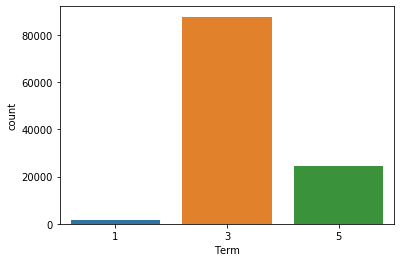

In [16]:
sns.countplot(df.Term)


we can see that most of the loans are 3 years long, while we have a very small percentage taking 1 year

--------

#### Now let's look the amounts variable

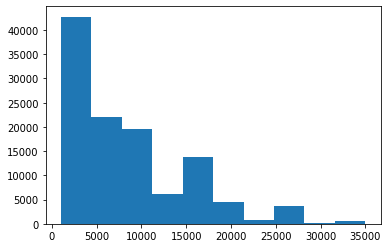

In [17]:
plt.hist(df.LoanOriginalAmount);

We notice that the distribution of the amouns is right skewed with most loans being between 0-100k $

----------

Let's see what most people take loans for

In [18]:
df["ListingCategory (numeric)"].head(3)

0    0
1    2
2    0
Name: ListingCategory (numeric), dtype: int64

I'll create a new variable ListingCategory which maps the numbers to the actual listings

In [19]:
categories = {0 : "Not Available",
              1 : "Debt Consolidation",
              2 : "Home Improvement",
              3 : "Business",
              4 : "Personal Loan",
              5 : "Student Use",
              6 : "Auto",
              7: "Other",
              8 : "Baby&Adoption",
              9 : "Boat",
              10 : "Cosmetic Procedure",
              11 : "Engagement Ring",
              12 : "Green Loans",
              13 :"Household Expenses",
              14 : "Large Purchases",
              15 : "Medical/Dental",
              16 : "Motorcycle",
              17 : "RV",
              18 : "Taxes",
              19 : "Vacation",
              20 : "Wedding Loans"}

In [20]:
df["ListingCategory"] = df["ListingCategory (numeric)"].map(categories)

In [21]:
df[["ListingCategory (numeric)", "ListingCategory"]].head()

,ListingCategory (numeric),ListingCategory
0,0,Not Available
1,2,Home Improvement
2,0,Not Available
3,16,Motorcycle
4,2,Home Improvement


In [22]:
top_categories = df.ListingCategory.value_counts()[:7]
top_categories

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Name: ListingCategory, dtype: int64

In [23]:
other_nan = top_categories.index.isin(["Other", "Not Available"])

#Excluding the categoris Other & Not avaliable
top_categories = top_categories[~other_nan]
top_categories

Debt Consolidation    58308
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Name: ListingCategory, dtype: int64

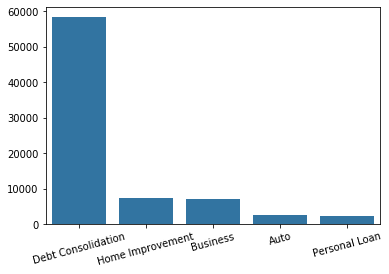

In [24]:
plt.figure(figsize=[6, 4])
sns.barplot(top_categories.index, top_categories.values, color=base_color)
plt.xticks(rotation=15);

 Most of the loans where taken to pay other loans and debts. Interesting insight

------

Let's check what kinds of people take these loans based on occupations

In [25]:
occupations_10 = df['Occupation'].value_counts()[:10]
occupations_10.head()

Other                  28617
Professional           13628
Computer Programmer     4478
Executive               4311
Teacher                 3759
Name: Occupation, dtype: int64

The first category is other should be excluded and alos the category Proffesionl should be excluded since it includes all professions which require higher education, so since we have lots of proffesional occupaations let's rely on them and visualize without a category 'Proffesional'

In [26]:
occupations_10 = df['Occupation'].value_counts()[2:12]
occupations_10.head()

Computer Programmer         4478
Executive                   4311
Teacher                     3759
Administrative Assistant    3688
Analyst                     3602
Name: Occupation, dtype: int64

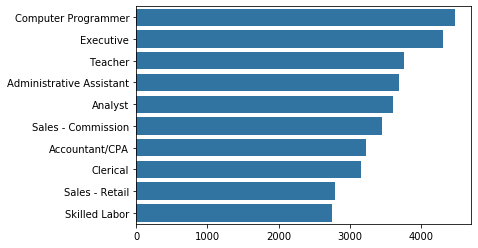

In [27]:
plt.figure(figsize=[6, 4])
sns.barplot(occupations_10.values,occupations_10.index, color=base_color);


So it seems that the most registerd occupation in our dataset is Computer Programmer.

I don't like the result of the previous analysis, It is a known fact that Computer Programmer is not the most known occupation out there, not even close. It is alos known that computer programmers are payed well, so our dataset might be a little biased

--------

Let's look at the IncomeRange column

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

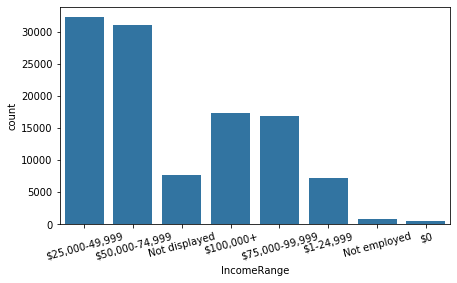

In [28]:
plt.figure(figsize=[7, 4])
sns.countplot(data=df, x="IncomeRange", color=base_color)
plt.xticks(rotation=15)

We need to categorize IncomeRange column

In [29]:
list(df.IncomeRange.unique())


['$25,000-49,999',
 '$50,000-74,999',
 'Not displayed',
 '$100,000+',
 '$75,000-99,999',
 '$1-24,999',
 'Not employed',
 '$0']

In [30]:
categories = ['Not displayed', 'Not employed', '$0', '$1-24,999',
              '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

In [31]:
incomeType = pd.api.types.CategoricalDtype(categories, ordered=True)
df.IncomeRange = df.IncomeRange.astype(incomeType)

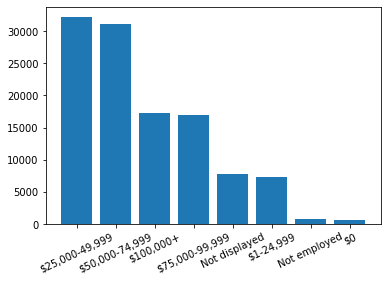

In [32]:
plt.bar(df.IncomeRange.value_counts().index, df.IncomeRange.value_counts().values)
plt.xticks(rotation=25);

We shouldn't visualize by value_counts

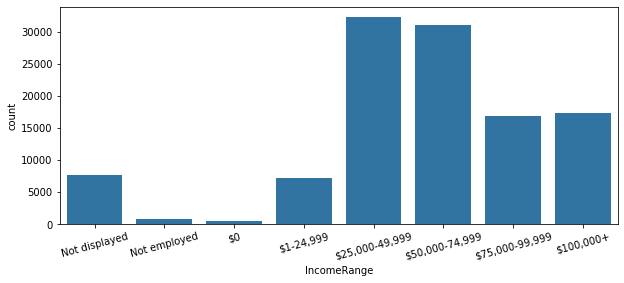

In [33]:
plt.figure(figsize=[10, 4])
sns.countplot(data=df, x="IncomeRange", color=base_color)
plt.xticks(rotation=15);

After doing some reasearch on loans and how they work, I found out that BorrowerAPR is more important the BorrowerRate, since it also includes the added fees.
This takes us to the our first main question:


# 1. What affects the borrowers annual interest rate (APR)?

Let's look at the occupations of the borrowers, and what occupation takes a larger loan amount

In [34]:
occ_amount = df.groupby("Occupation").LoanOriginalAmount.mean().sort_values(ascending=False)

In [35]:
top10_occ_amount = occ_amount[:10]
#i'll reverst the least list
least10_occ_amount = occ_amount[-10:]

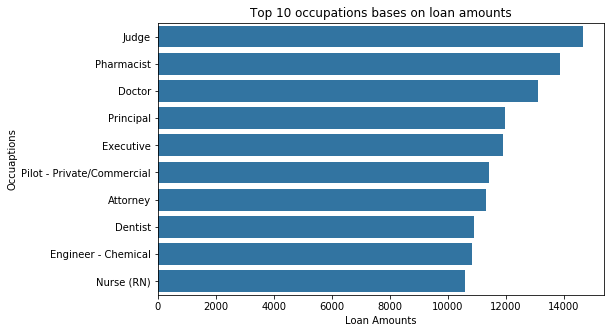

In [36]:
plt.figure(figsize=(8, 5));
sns.barplot(top10_occ_amount.values, top10_occ_amount.index, color=base_color);
plt.title("Top 10 occupations bases on loan amounts");
plt.xlabel("Loan Amounts");
plt.ylabel("Occuaptions");


Text(0, 0.5, 'Occuaptions')

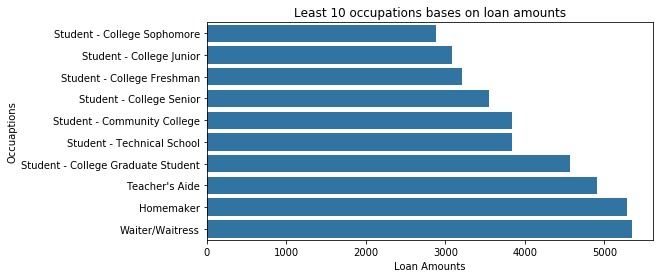

In [37]:
plt.figure(figsize=(8, 4));
sns.barplot(least10_occ_amount.values[::-1], least10_occ_amount.index[::-1], color=base_color);
plt.title("Least 10 occupations bases on loan amounts")
plt.xlabel("Loan Amounts")
plt.ylabel("Occuaptions")


We see that Judges, pharmacists, and doctors are the top 3 when it comes to loan amounts.
while students take over the least occupations based on the loan amounts

------


Let's check Occupations vs BorrowerAPR

In [38]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'Term', 'ListingCategory (numeric)',
       'ProsperScore', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',
       'BorrowerState', 'BankcardUtilization', 'CurrentDelinquencies',
       'TotalInquiries', 'ListingCategory'],
      dtype='object')

In [39]:
# We will plot the top 5 and the last 5 occupations based on BorrowerAPR
occupations_apr = df.groupby("Occupation").BorrowerAPR.mean().sort_values(ascending=False)
top10_occ_apr_most = occupations_apr[:5]
top10_occ_apr_least = occupations_apr[-5:]
top10_occ_apr = top10_occ_apr_most.append(top10_occ_apr_least)

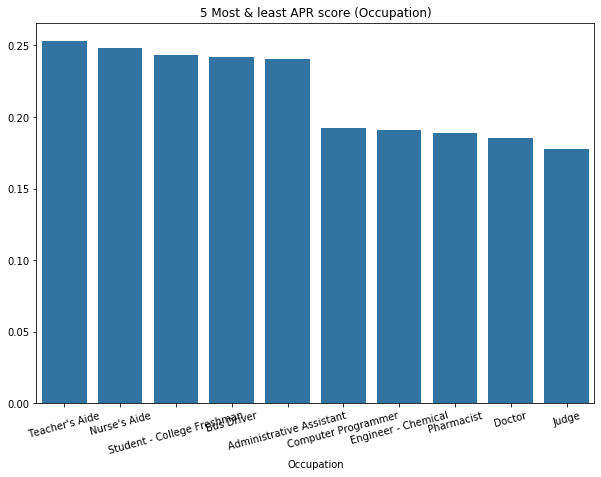

In [40]:
plt.figure(figsize=(10, 7));
sns.barplot(top10_occ_apr.index, top10_occ_apr.values, color=base_color);
plt.xticks(rotation=15);
plt.title("5 Most & least APR score (Occupation)");

We notice that less earning jobs have much more APR than high earners

------

Let's check how home owning affects the borrower apr

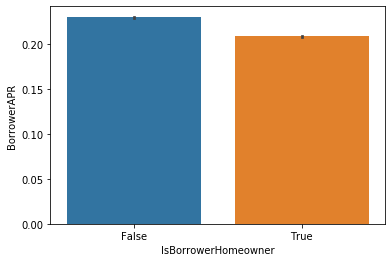

In [41]:
sns.barplot(data = df, x ="IsBorrowerHomeowner", y="BorrowerAPR");

 We notice that home owning decreases the rate with a value of nearely 2.5

--------

Let's compare APRs based on employments status

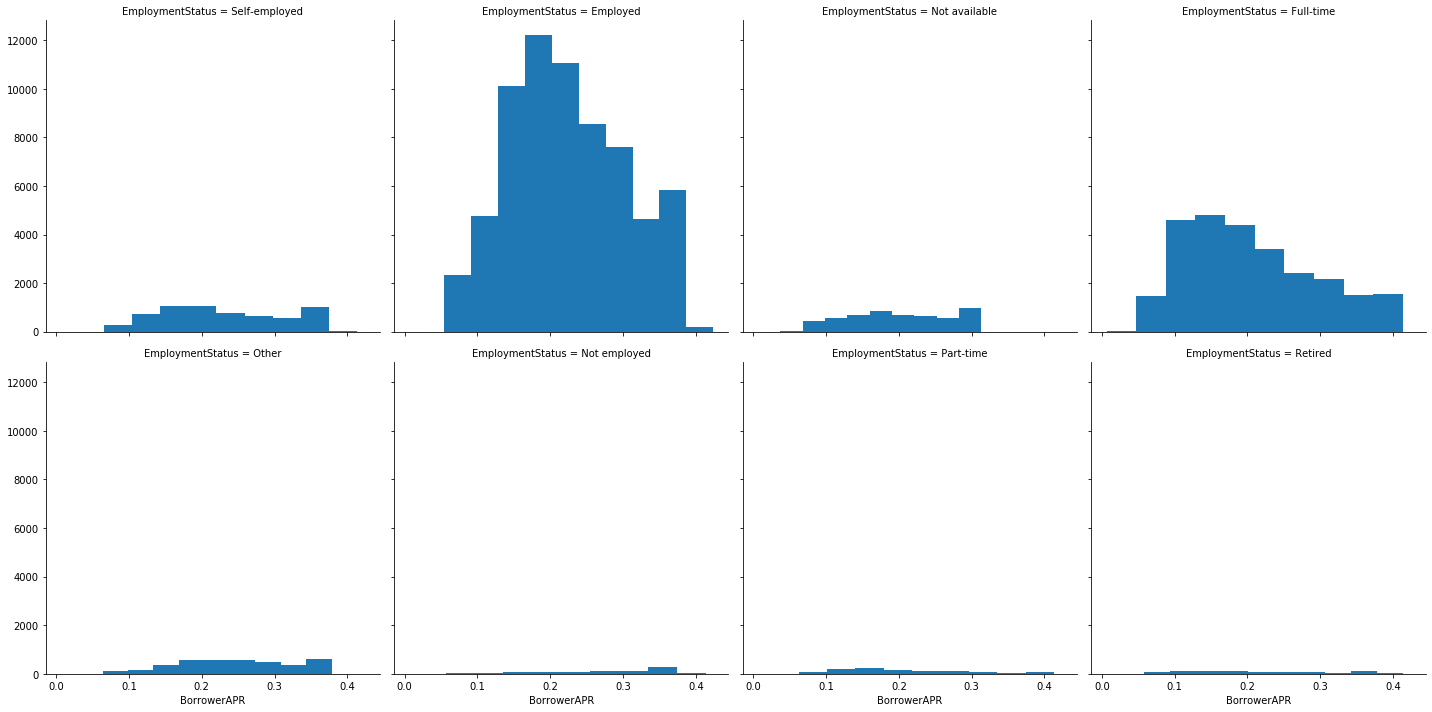

In [42]:
g = sns.FacetGrid(data = df, height =5, col_wrap=4, col = "EmploymentStatus");
g.map(plt.hist, "BorrowerAPR");

this may not be very informative sense the categories are imbalanced. And full-time is Employed in a sense so we may want to seperate them

In [43]:
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

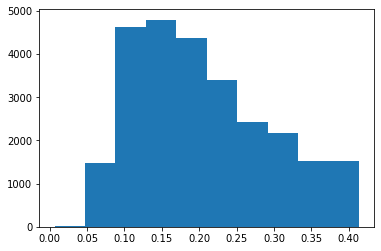

In [44]:
plt.hist(df[df["EmploymentStatus"] == "Full-time"].BorrowerAPR);

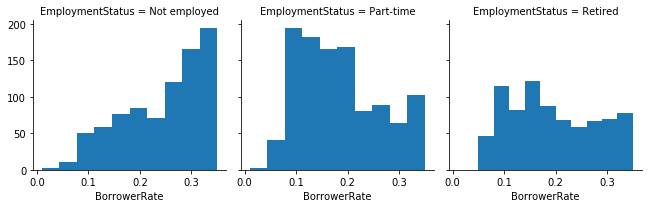

In [45]:
g = sns.FacetGrid(data = df.loc[df["EmploymentStatus"].isin(['Not employed', 'Part-time', 'Retired'])],height =3, col_wrap=4, col = "EmploymentStatus");
g.map(plt.hist, "BorrowerRate");

We notice that Not employed people have the highest APR value which makes sense, while part-time generally have a lower apr precentage.

In [46]:
df_sample = df.sample(2000)

Let's look at the realationship between the loan amount and borrower APR

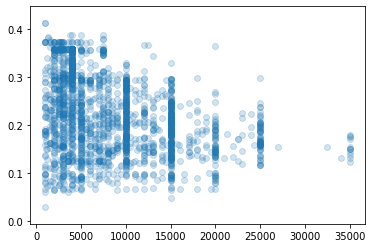

In [47]:
plt.scatter(df_sample.LoanOriginalAmount, df_sample.BorrowerAPR, alpha = 0.2);


In [48]:
df[["LoanOriginalAmount",  "BorrowerAPR"]].corr()

,LoanOriginalAmount,BorrowerAPR
LoanOriginalAmount,1.000000,-0.322887
BorrowerAPR,-0.322887,1.000000


we have a somwhat weak negative correlation between amount and apr

-----

Let's check the corealtion heatmap

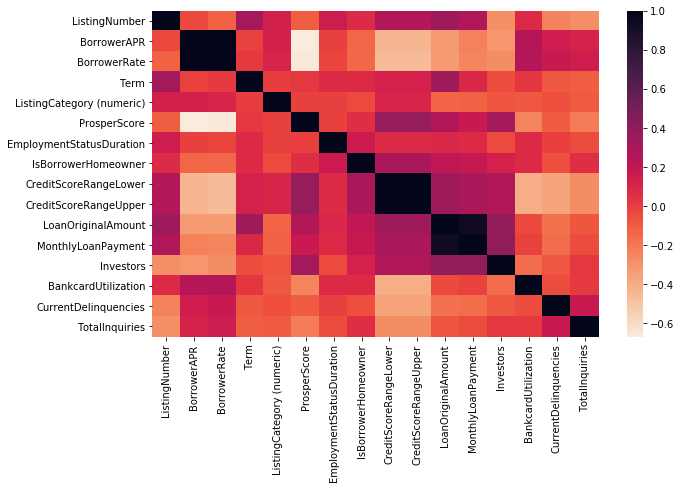

In [49]:
plt.figure(figsize=[10, 6])
sns.heatmap(df.corr(), cmap = "rocket_r");

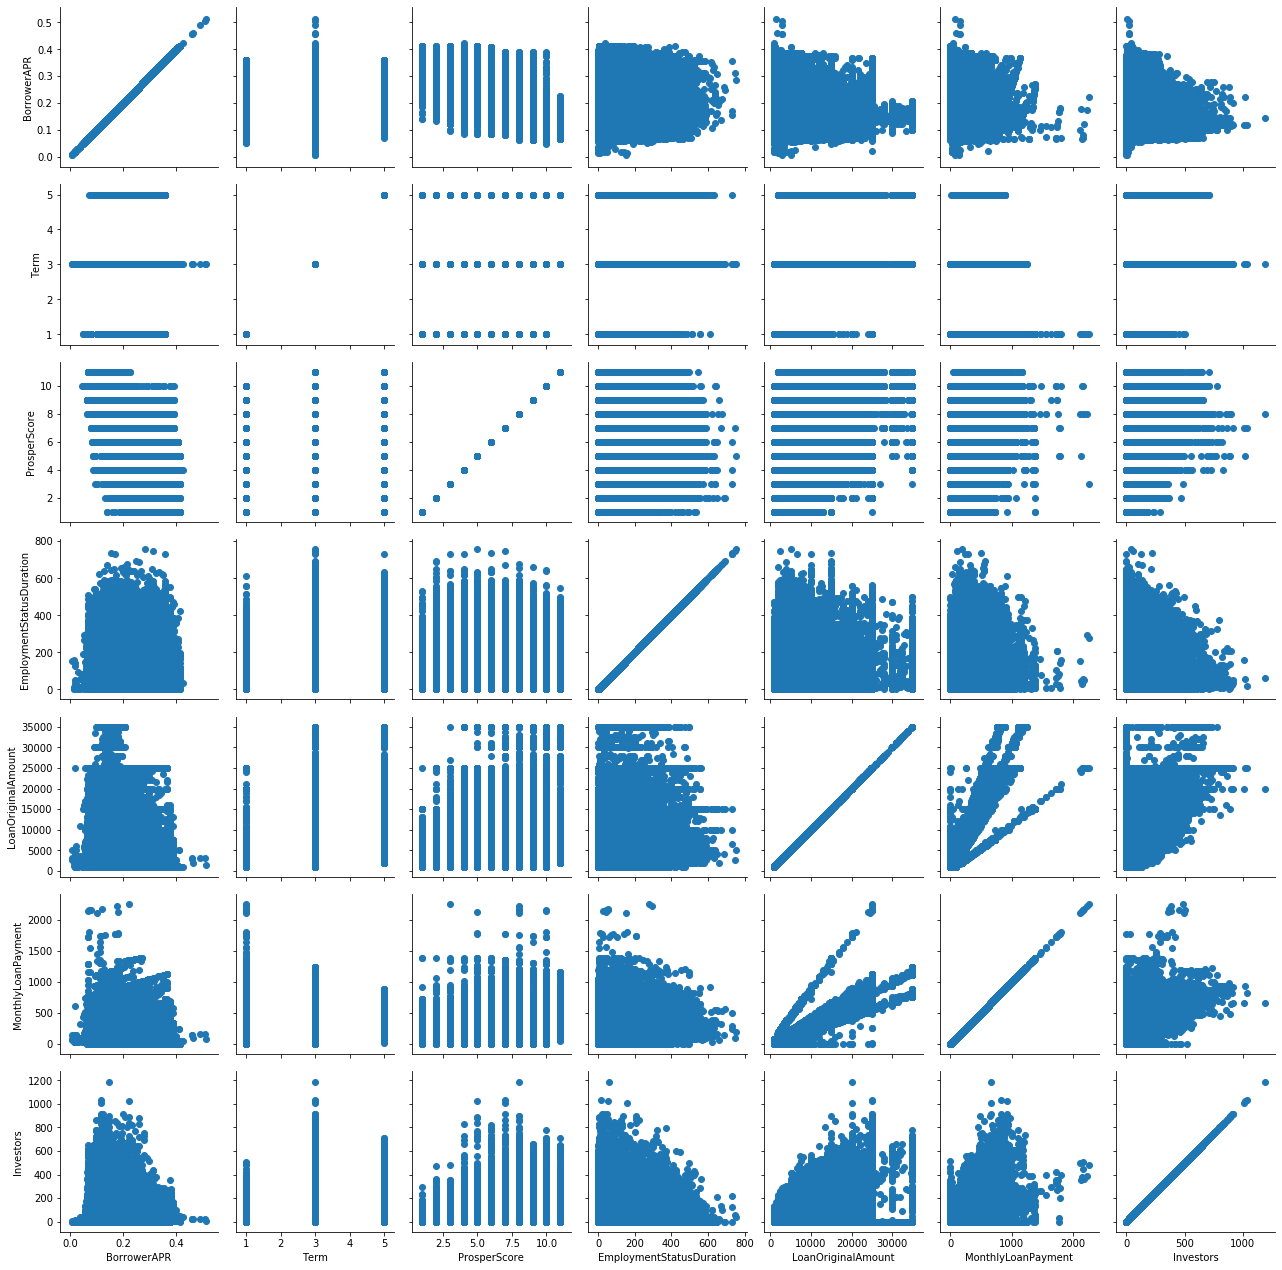

In [50]:
g = sns.PairGrid(df[["BorrowerAPR", "Term", "ProsperScore",
                     "EmploymentStatusDuration", "LoanOriginalAmount", "MonthlyLoanPayment", "Investors"]])
g.map(plt.scatter)

There is strong negative correlation between BorrowerAPR and ProsperScore

In [51]:
df.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

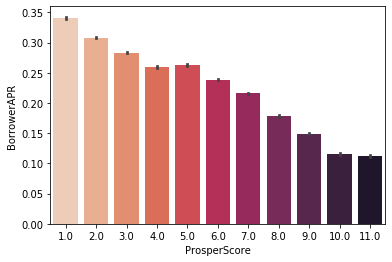

In [52]:
sns.barplot(data = df, x = "ProsperScore", y = "BorrowerAPR", palette="rocket_r");

In [53]:
df[["BorrowerAPR", "ProsperScore"]].corr()

,BorrowerAPR,ProsperScore
BorrowerAPR,1.000000,-0.668287
ProsperScore,-0.668287,1.000000


ProsperScore is the most correlated factor to borrowerAPR which makes sense since it is a measure of risk, and with high risk a greater penality which is a high APR.

------

Let's check how states affect the borrowerApr

In [54]:
states = df.groupby("BorrowerState").BorrowerAPR.mean().sort_values(ascending=False)
states_higher = states[:5]
states_lower = states[-5:]
states_10 = pd.concat([states_higher, states_lower])

In [55]:
states_10

BorrowerState
AL    0.237951
AR    0.237160
SD    0.236889
MS    0.233717
NV    0.233495
MA    0.210806
DE    0.208879
DC    0.202246
ME    0.178353
IA    0.177922
Name: BorrowerAPR, dtype: float64

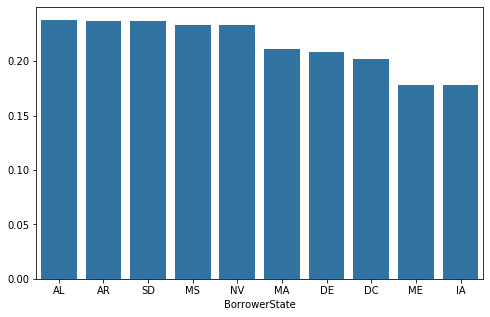

In [56]:
plt.figure(figsize=[8,5])
sns.barplot(states_10.index, states_10.values, color=base_color);

In [57]:
states_10.max() - states_10.min()

0.06002911227881394

we have a 6% differnce between the highest and lowest state in terms of APR value, so states acutally may be a determinant factor

##### Initial thoughts:
* having a job that pays well will difenatly decrease apr
* owing a home will decrease the apr
* having a high prosper score but a propser score depends on your credit history so you must take your financial decision carefully
* Living in specific states has a significant effect on the apr score

-------

# 2. What makes people with less earning jobs standout and have a low APR?

Let's determine the 10 occupations with highest APR value

In [58]:
#We already have an apr based on occupations variable so let's use it

low_occupations = occupations_apr[:10]
high_occupations = occupations_apr[-10::]

In [59]:
low_occupations

Occupation
Teacher's Aide                0.253311
Nurse's Aide                  0.247863
Student - College Freshman    0.243219
Bus Driver                    0.242233
Administrative Assistant      0.240702
Food Service                  0.239988
Laborer                       0.239459
Waiter/Waitress               0.238863
Clerical                      0.237873
Sales - Retail                0.237255
Name: BorrowerAPR, dtype: float64

In [60]:
low_occupations.values.mean()

0.24207664891092256

In [61]:
high_occupations.values.mean()

0.1906095758362045

Let's look for people with low occupations having apr value less than the high occupations mean

In [62]:
df.shape

(113937, 24)



I'll query a dataframe with peopnly only working at low occupations, then i'll mark people with low apr value and compare them to the rest. 
The the seperation threshold will be the mean apr of the high occupations

In [63]:
threshold = high_occupations.values.mean()
threshold

0.1906095758362045

In [64]:
low_occ_df = df.loc[(df["Occupation"].isin(low_occupations.index.values))].copy()

In [65]:
low_occ_df["OccupationCondition"] = "bad"

In [66]:
low_occ_df.loc[(df["BorrowerAPR"] < threshold), "OccupationCondition"] = "good"

In [67]:
low_occ_df.shape

(13927, 25)

I'll balacne the two categories so that i can compare the categories properly

In [68]:
low_occ_df.OccupationCondition.value_counts()

bad     9759
good    4168
Name: OccupationCondition, dtype: int64

In [69]:
bad_sample = low_occ_df.query("OccupationCondition == 'bad'").sample(4000)
good_sample = low_occ_df.query("OccupationCondition == 'good'").sample(4000)

In [70]:
low_occ_balanced = pd.concat([bad_sample, good_sample])

In [71]:
low_occ_balanced.shape

(8000, 25)

In [72]:
low_occ_balanced.OccupationCondition.value_counts()

good    4000
bad     4000
Name: OccupationCondition, dtype: int64

We must compare the two groups on most variabls to understand what distinguishes them

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


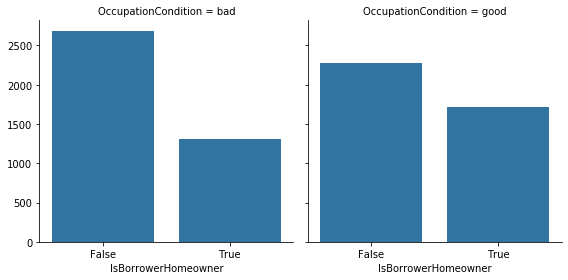

In [73]:
g = sns.FacetGrid(low_occ_balanced, col="OccupationCondition", height=4);
g.map(sns.countplot, "IsBorrowerHomeowner");

There is an appearent difference between the two cartegories, we see that people marked with good OccupationCondition have a higher home owning precentage

In [74]:
low_occ_balanced.groupby("OccupationCondition")["IsBorrowerHomeowner"].mean()

OccupationCondition
bad     0.32875
good    0.42950
Name: IsBorrowerHomeowner, dtype: float64

a 9% difference

-------

Let's check the counts of income 

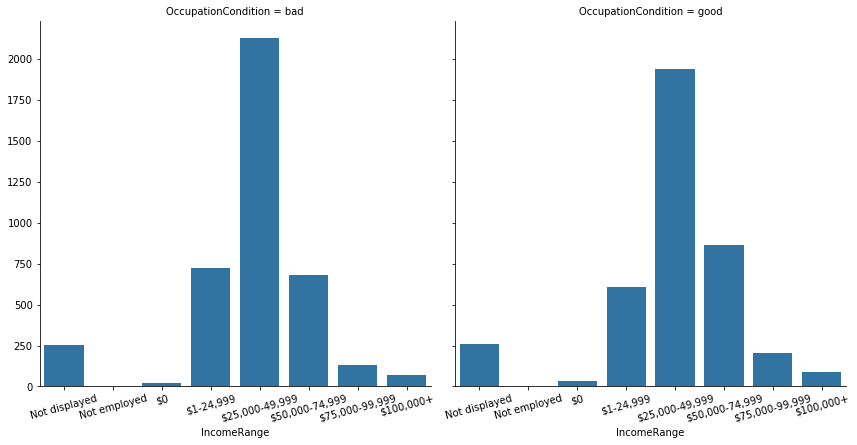

In [75]:

g = sns.FacetGrid(low_occ_balanced, col="OccupationCondition", height=6);
g.map(sns.countplot, "IncomeRange");
g.set_xticklabels(rotation=15);

We notice that there's a slight increase in the income range when the APR score is considered good, but it is also not that significant.

In [76]:
low_occ_balanced.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'Term', 'ListingCategory (numeric)',
       'ProsperScore', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',
       'BorrowerState', 'BankcardUtilization', 'CurrentDelinquencies',
       'TotalInquiries', 'ListingCategory', 'OccupationCondition'],
      dtype='object')

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


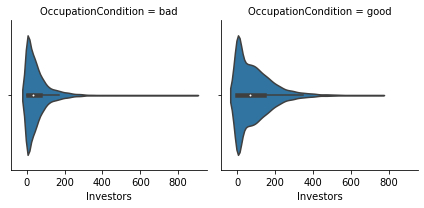

In [77]:
g = sns.FacetGrid(data=low_occ_balanced, col = "OccupationCondition");
g.map(sns.violinplot, "Investors");

we can see a huge difference in the number of investors, but this doesn't really help because we already know that low_apr is corelated with more investors. It is not a thing that distinguishes high and low earners

But why did investors choose to trust this person thou?

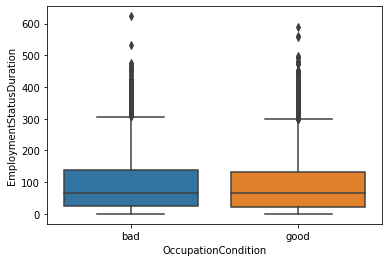

In [78]:
sns.boxplot(data=low_occ_balanced, x="OccupationCondition", y = "EmploymentStatusDuration")

This is intersing, I thought the employment duration was the main reason why some low earners have low apr score, but appearently it is not

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


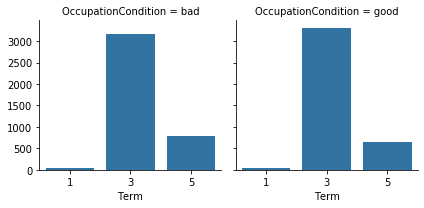

In [79]:
g = sns.FacetGrid(data=low_occ_balanced, col = "OccupationCondition")
g.map(sns.countplot, "Term")

No significant difference

In [80]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'Term', 'ListingCategory (numeric)',
       'ProsperScore', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',
       'BorrowerState', 'BankcardUtilization', 'CurrentDelinquencies',
       'TotalInquiries', 'ListingCategory'],
      dtype='object')

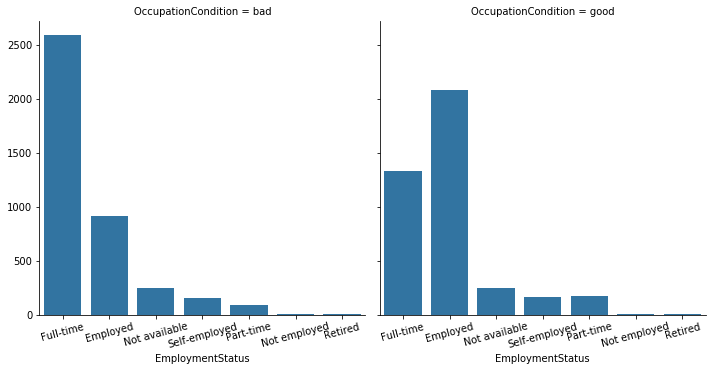

In [81]:
g = sns.FacetGrid(data=low_occ_balanced, col = "OccupationCondition", height=5)
g.map(sns.countplot, "EmploymentStatus")
g.set_xticklabels(rotation=15);

This is a significant, we notice that people makred as having good apr have a much highe full-timers, while people marked as having low apr have a higehr part-timers

I don't know thou why the category Employed is there because employed is a general category that include (full-time, part-time, self-emplyed)

In [82]:
low_occ_df.Occupation.value_counts()

Administrative Assistant      3688
Clerical                      3164
Sales - Retail                2797
Laborer                       1595
Food Service                  1123
Nurse's Aide                   491
Waiter/Waitress                436
Bus Driver                     316
Teacher's Aide                 276
Student - College Freshman      41
Name: Occupation, dtype: int64

-----

Let's anaylize the nature of missing values between the two subsets

In [83]:
low_occ_df.query("OccupationCondition == 'bad'").isnull().sum().sort_values(ascending=False)[:4]



ProsperScore                2276
EmploymentStatusDuration     588
BankcardUtilization          585
BorrowerState                364
dtype: int64

In [84]:
low_occ_df.query("OccupationCondition == 'good'").isnull().sum().sort_values(ascending=False)[:4]



ProsperScore                1601
BankcardUtilization          256
EmploymentStatusDuration     256
BorrowerState                232
dtype: int64

-------

Let's check the states

In [85]:
#we aleardy have a series with the highest and lowest 5 states
states_10

BorrowerState
AL    0.237951
AR    0.237160
SD    0.236889
MS    0.233717
NV    0.233495
MA    0.210806
DE    0.208879
DC    0.202246
ME    0.178353
IA    0.177922
Name: BorrowerAPR, dtype: float64

-----


Let's check the apr score for people with low earning jobs living in AL compared to people living in IA

This is not the greatest approcach but i kept it to showcase my thought process

In [86]:
low_occ_states = low_occ_balanced.loc[low_occ_balanced["BorrowerState"].isin(["AL", "IA"])]

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


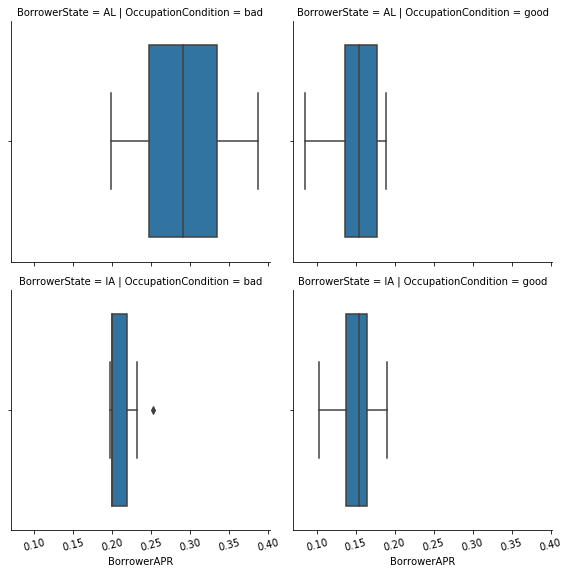

In [87]:
g = sns.FacetGrid(low_occ_states, col="OccupationCondition", row="BorrowerState", height=4);
g.map(sns.boxplot, "BorrowerAPR");
g.set_xticklabels(rotation=15);

we seem to have very little data on people living in IA but there is a significant differnce that should be thought of

In [88]:
low_occ_balanced.loc[low_occ_balanced["BorrowerState"].isin(["IA", "AL"])].BorrowerState.value_counts()

AL    128
IA     26
Name: BorrowerState, dtype: int64

Well... only 24 people live in IA so my approach is not good enought i must find another way

Let's seperate the states based the apr precentage, If the apr is greater than the the medain then the state is marked as bad otherwise it is marked as good

In [89]:
states_apr = df.groupby("BorrowerState")["BorrowerAPR"].mean()
states_apr.head()

BorrowerState
AK    0.212828
AL    0.237951
AR    0.237160
AZ    0.216761
CA    0.218014
Name: BorrowerAPR, dtype: float64

In [90]:
states_median = states_apr.median()
states_median

0.21962244009584753

In [91]:
#Good stands for low apr whild Bad stands for high apr
low_occ_balanced["StateCondition"] = np.nan
for i in low_occ_balanced.index.values:
    try:
        state_apr = states_apr[low_occ_balanced.loc[i, "BorrowerState"]]
        if state_apr >= states_median:
            low_occ_balanced.loc[i, "StateCondition"] = "bad"
        else:
            low_occ_balanced.loc[i, "StateCondition"] = "good"
    except:
        pass

In [92]:
low_occ_balanced.StateCondition.value_counts()

good    4654
bad     2974
Name: StateCondition, dtype: int64

In [93]:
low_occ_balanced.OccupationCondition.value_counts()

good    4000
bad     4000
Name: OccupationCondition, dtype: int64

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


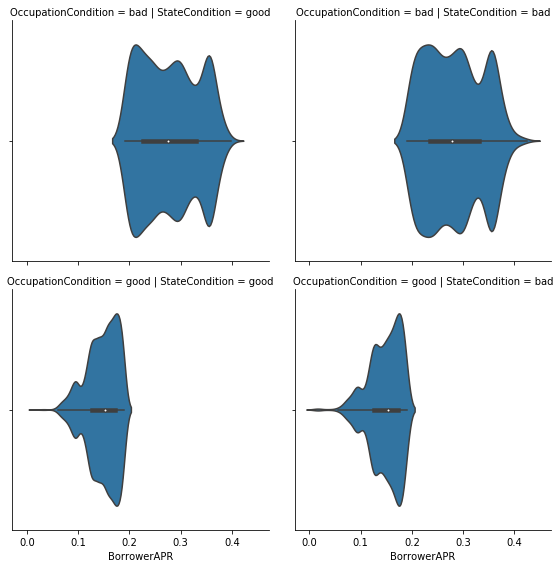

In [94]:
g = sns.FacetGrid(data=low_occ_balanced, col = "StateCondition", row="OccupationCondition", height=4);
g.map(sns.violinplot, "BorrowerAPR");

* Interesting... I think this is a much better insight than the one done earlier.
* We notice that states acutally do not make that much of a differnce, people with bad occupations still have high apr  in good and bad states

wait..

#### I just realized that my second approach was also wrong, I already know that rows marked OccupationCondition = good have low apr, while rows marked with bad have high apr. So I shouldn't be looking at the apr but rather I should look at other variables to find other indicators of the apr being low where the occupation is considered low too.

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


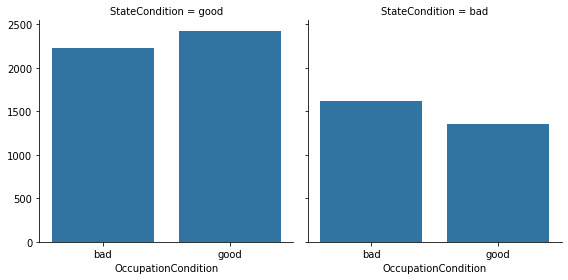

In [95]:
g = sns.FacetGrid(data=low_occ_balanced, col = "StateCondition", height=4);
g.map(sns.countplot, "OccupationCondition");

We notice that in state markd as 'good' there are more people with good apr precentages while it is the other way around in bad states

------

Let's look at the total inquiries which is the total number of inquiries at the time the credit profile was pulled.

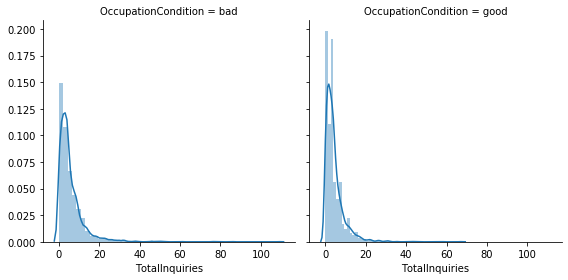

In [96]:
g = sns.FacetGrid(data=low_occ_balanced, col = "OccupationCondition",height=4)
g.map(sns.distplot, "TotalInquiries");

Also no significant differene but people marked with good apr seem to have slightley less total inquiries count

------

Not let's look at the variabl BankcardUtilization which is the percentage of available revolving credit that is utilized at the time the credit profile was pulled.

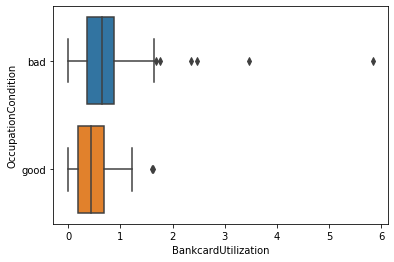

In [97]:
sns.boxplot(data=low_occ_balanced, y="OccupationCondition", x="BankcardUtilization");

So this is acutally good, people with low apr seem to have a less utilized credit precentage when the credit was pulled

In [98]:
low_occ_balanced.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'Term', 'ListingCategory (numeric)',
       'ProsperScore', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',
       'BorrowerState', 'BankcardUtilization', 'CurrentDelinquencies',
       'TotalInquiries', 'ListingCategory', 'OccupationCondition',
       'StateCondition'],
      dtype='object')

##### Initial thoughts:
Well if you want to have a low apr socre when you don't have the best job in the world; you must be careful about your credit rating and history, a low utilized credit precentage would lead to less apr, also try owning a house in a state known for having low aprs such as Iowa, Maine, or Washington, D.C.

# 3. What is associated with a low prosper score?

Prosper score is a custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

We know that it is build on historical financial data but what makes a propser score of 7 for example better than a 3?
What facotrs increase or decrease the prosper score?
let's find out.

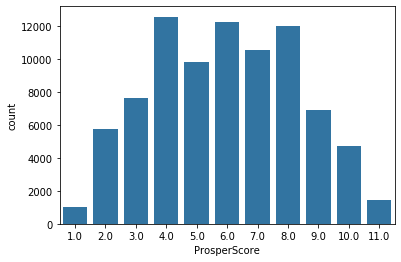

In [100]:
sns.countplot(df["ProsperScore"], color = base_color);

Let's first seperate the dataset into 2 clusters, Low prosper & High prosper.
low porsper will take values form 1-5, while high prosper will take values from 6-11

In [101]:
df.loc[(df["ProsperScore"] <=5), "ProsperCondition"] = "Low"
df.loc[(df["ProsperScore"] >5), "ProsperCondition"] = "High"

In [102]:
df.ProsperCondition.value_counts()

High    48045
Low     36808
Name: ProsperCondition, dtype: int64

In [103]:
df[["ProsperScore", "ProsperCondition"]].isnull().sum()

ProsperScore        29084
ProsperCondition    29084
dtype: int64

In [104]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'LoanStatus',
       'BorrowerAPR', 'BorrowerRate', 'Term', 'ListingCategory (numeric)',
       'ProsperScore', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange',
       'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors',
       'BorrowerState', 'BankcardUtilization', 'CurrentDelinquencies',
       'TotalInquiries', 'ListingCategory', 'ProsperCondition'],
      dtype='object')

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


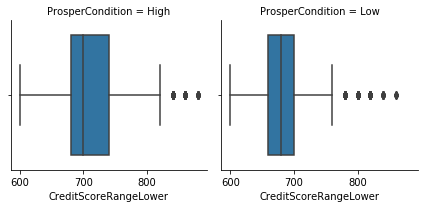

In [105]:
g=sns.FacetGrid(data=df, col="ProsperCondition", height=3)
g.map(sns.boxplot, "CreditScoreRangeLower");

ًWe notice that people with higher Prosper Score have a greater lower credit score which makes snense

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


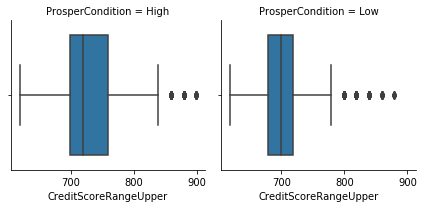

In [106]:
g=sns.FacetGrid(data=df, col="ProsperCondition", height=3)
g.map(sns.boxplot, "CreditScoreRangeUpper");

We also notice that people with higehr Prosper Score have a greater higher Prosper Score which also makes sense

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


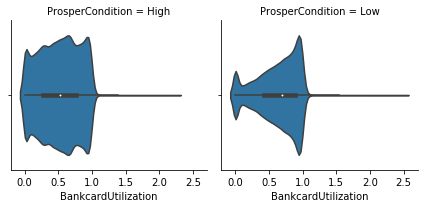

In [107]:
g=sns.FacetGrid(data=df, col="ProsperCondition", height=3)
g.map(sns.violinplot, "BankcardUtilization");

This is a great insight, people with higher prosper score generally have a much less bank card utilization rate

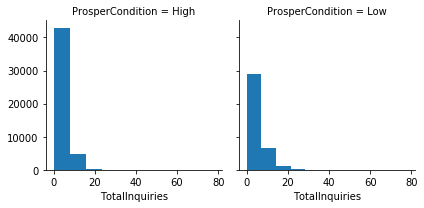

In [108]:
g=sns.FacetGrid(data=df, col="ProsperCondition", height=3)
g.map(plt.hist, "TotalInquiries");

In [109]:
prosper_inquiries = df.groupby("ProsperCondition")['TotalInquiries'].mean()
prosper_inquiries

ProsperCondition
High    3.679405
Low     5.087916
Name: TotalInquiries, dtype: float64

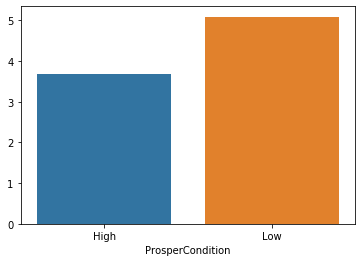

In [110]:
sns.barplot(prosper_inquiries.index, prosper_inquiries.values);

We see almost a 20% difference between the two clusters, People with higher propser score have less total inquiries

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


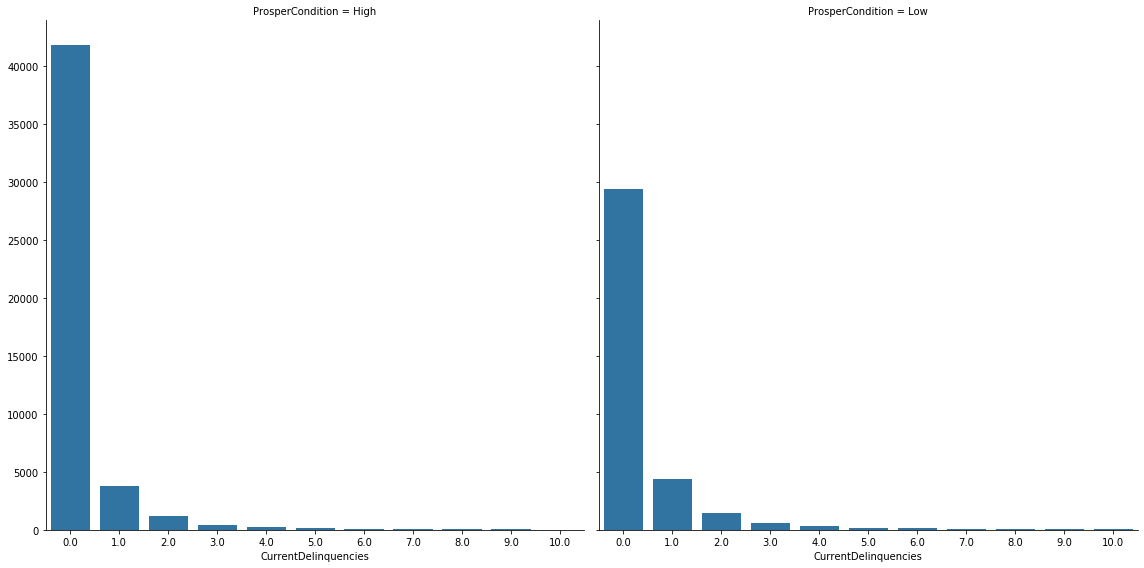

In [111]:
g=sns.FacetGrid(data=df.query("CurrentDelinquencies <= 10"),col="ProsperCondition", height=8);
g.map(sns.countplot, "CurrentDelinquencies");

In [112]:
prosper_delinquencies = df.groupby("ProsperCondition")['CurrentDelinquencies'].mean()
prosper_delinquencies

ProsperCondition
High    0.251826
Low     0.414638
Name: CurrentDelinquencies, dtype: float64

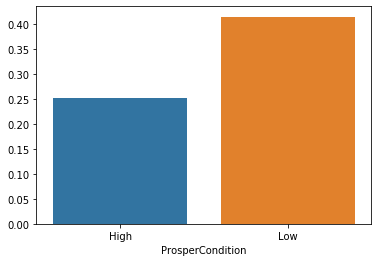

In [113]:
sns.barplot(prosper_delinquencies.index, prosper_delinquencies.values);

/Users/yazeed/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


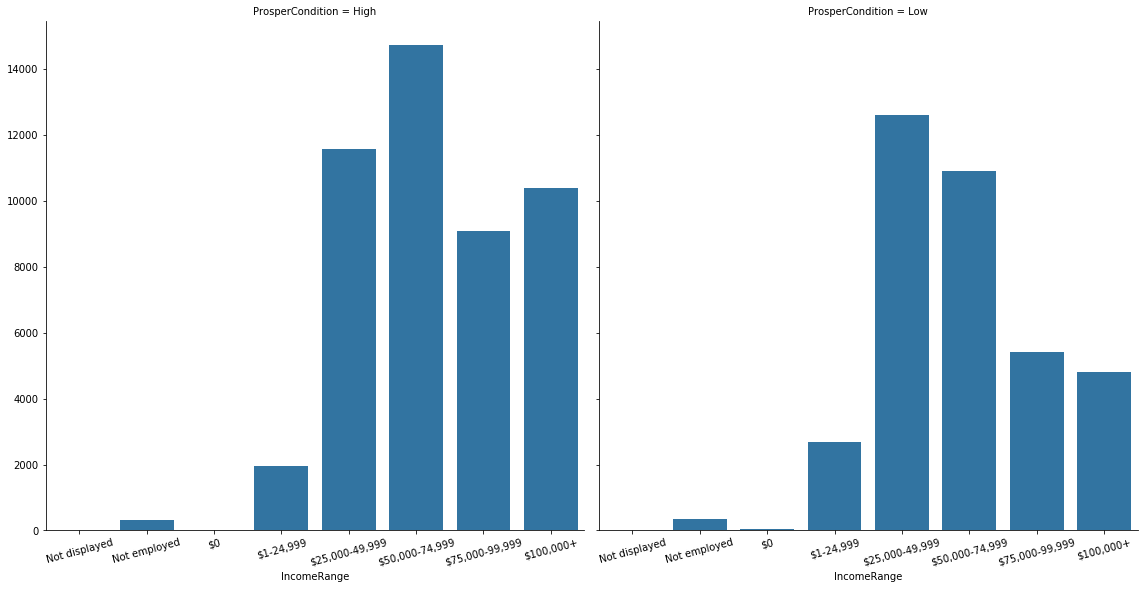

In [114]:
g=sns.FacetGrid(data=df,col="ProsperCondition", height=8)
g.map(sns.countplot, "IncomeRange");
g.set_xticklabels(rotation=15);

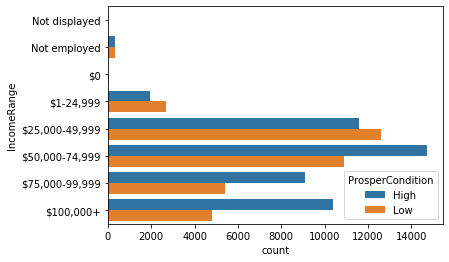

In [115]:
plt.figure(figsize=[6,4])
sns.countplot(y=df["IncomeRange"], hue=df["ProsperCondition"])

We notice that as the income rises the prosper score more people are marked as having a high prosper score

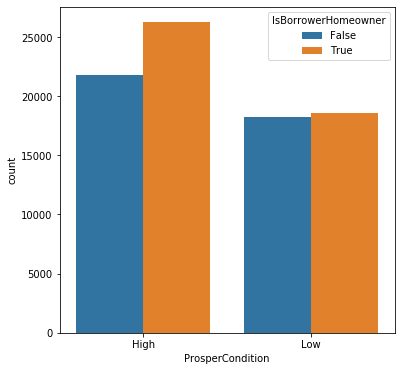

In [116]:
plt.figure(figsize=[6,6]);
sns.countplot(x=df["ProsperCondition"], hue=df["IsBorrowerHomeowner"]);

We notice that more people with hiehr prosper score own homes

In [117]:
prosper_duration = df.groupby("ProsperCondition")["EmploymentStatusDuration"].mean()
prosper_duration

ProsperCondition
High    102.557480
Low     103.705136
Name: EmploymentStatusDuration, dtype: float64

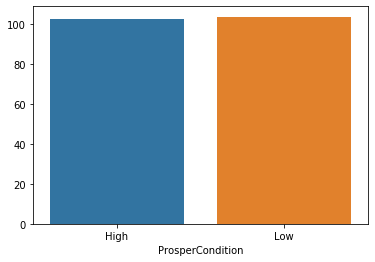

In [118]:
sns.barplot(prosper_duration.index, prosper_duration.values);

No significant difference

##### Thoughts:
If you want to get a higher prosper score you must be very careful with your financial decision from day 1, your credit score has a significant effect on your prosper score, also you must be aware of your bank card utilization rate, since a lower rate = a higher prosper score, and ofcourse owning a home would always raise the prosper score. You can't really choose your income but a higher income is associated with a higher prosper score, It is also known that a lower number of delinquet accounts = a much higher prosper score.